# Unsupervised Learning - Project

In this Project, we are going to perform a full unsupervised learning machine learning project on a "Wholesale Data" dataset. The dataset refers to clients of a wholesale distributor. It includes the annual spending in monetary units (m.u.) on diverse product categories

[Kaggle Link](https://www.kaggle.com/datasets/binovi/wholesale-customers-data-set)

# Part I : EDA - Exploratory Data Analysis & Pre-processing

The given dataset seems to be a grocery sales dataset containing information about various products sold by a grocery store. To perform an exploratory data analysis (EDA) on this dataset, we can perform the following tasks:

- Data Import: Import the dataset into a statistical software tool such as Python or R.
- Data Cleaning: Check the dataset for any missing or incorrect data and clean the dataset accordingly. This may involve removing or imputing missing data or correcting any obvious errors.
Data Description: Generate summary statistics such as mean, median, and standard deviation for each column of the dataset. This will help in understanding the distribution of data in each column.
- Data Visualization: Create various visualizations such as histograms, box plots, scatter plots, and heatmaps to understand the relationships and trends between the different variables in the dataset. For example, we can create a scatter plot between the "Fresh" and "Milk" variables to see if there is any correlation between them.
- Outlier Detection: Check for any outliers in the dataset and determine whether they are valid or erroneous data points.
- Correlation Analysis: Calculate the correlation between different variables in the dataset to determine which variables are highly correlated and which ones are not. For example, we can calculate the correlation between "Grocery" and "Detergents_Paper" to see if there is any relationship between these two variables.
- Data Transformation: If necessary, transform the data by standardizing or normalizing the variables to make them comparable across different scales.
- Feature Selection: Identify the most important features or variables that contribute the most to the overall variance in the dataset. This can be done using various feature selection techniques such as principal component analysis (PCA) or random forest regression.

In [241]:
# import Libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns


In [242]:
# read csv
df = pd.read_csv("Wholesale_Data.csv")
df.head(2)

,Channel,Region,Fresh,Milk,Grocery,Frozen,Detergents_Paper,Delicassen
0,2,3,12669,9656,7561,214,2674,1338
1,2,3,7057,9810,9568,1762,3293,1776


In [243]:
# Check the Shape
df.shape

(440, 8)

In [244]:
# check data types and counts to see if there are missing values
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 440 entries, 0 to 439
Data columns (total 8 columns):
 #   Column            Non-Null Count  Dtype
---  ------            --------------  -----
 0   Channel           440 non-null    int64
 1   Region            440 non-null    int64
 2   Fresh             440 non-null    int64
 3   Milk              440 non-null    int64
 4   Grocery           440 non-null    int64
 5   Frozen            440 non-null    int64
 6   Detergents_Paper  440 non-null    int64
 7   Delicassen        440 non-null    int64
dtypes: int64(8)
memory usage: 27.6 KB


In [245]:
#Channel and Region DType changed to an object
df[['Channel','Region']] = df[['Channel','Region']].astype(str)
# Display the updated DataFrame
print(df.dtypes)


Channel             object
Region              object
Fresh                int64
Milk                 int64
Grocery              int64
Frozen               int64
Detergents_Paper     int64
Delicassen           int64
dtype: object


In [246]:
# check missing values


In [247]:
df['Channel'].value_counts()

1    298
2    142
Name: Channel, dtype: int64

In [248]:
df['Region'].value_counts()

3    316
1     77
2     47
Name: Region, dtype: int64

In [249]:
df.describe(include='object')

,Channel,Region
count,440,440
unique,2,3
top,1,3
freq,298,316


##### There are 2 distinct Channels and 3 distinct regions with majority spent in Channel 1 and Region 3

In [250]:
df.groupby(['Channel','Region']).sum()

Fresh     Milk  Grocery  Frozen  Detergents_Paper  \
Channel Region                                                        
1       1        761233   228342   237542  184512             56081   
        2        326215    64519   123074  160861             13516   
        3       2928269   735753   820101  771606            165990   
2       1         93600   194112   332495   46514            148055   
        2        138506   174625   310200   29271            159795   
        3       1032308  1153006  1675150  158886            724420   

                Delicassen  
Channel Region              
1       1            70632  
        2            30965  
        3           320358  
2       1            33695  
        2            23541  
        3           191752

## Feature Engineering

In [251]:
# Add new feature - Total_spend

df['Total_Spend'] = df['Fresh'] + df['Milk'] + df['Grocery'] + df['Frozen'] + df['Detergents_Paper'] + df['Delicassen']
df.head(2)

,Channel,Region,Fresh,Milk,Grocery,Frozen,Detergents_Paper,Delicassen,Total_Spend
0,2,3,12669,9656,7561,214,2674,1338,34112
1,2,3,7057,9810,9568,1762,3293,1776,33266


In [252]:
#Total Spend by Channel and Region

df.groupby(['Channel','Region']).sum()

Fresh     Milk  Grocery  Frozen  Detergents_Paper  \
Channel Region                                                        
1       1        761233   228342   237542  184512             56081   
        2        326215    64519   123074  160861             13516   
        3       2928269   735753   820101  771606            165990   
2       1         93600   194112   332495   46514            148055   
        2        138506   174625   310200   29271            159795   
        3       1032308  1153006  1675150  158886            724420   

                Delicassen  Total_Spend  
Channel Region                           
1       1            70632      1538342  
        2            30965       719150  
        3           320358      5742077  
2       1            33695       848471  
        2            23541       835938  
        3           191752      4935522

In [253]:
#Overall Spend by Product

columns = ['Fresh', 'Milk', 'Grocery', 'Frozen', 'Detergents_Paper', 'Delicassen']
column_sum = df[columns].sum()
column_sum

Fresh               5280131
Milk                2550357
Grocery             3498562
Frozen              1351650
Detergents_Paper    1267857
Delicassen           670943
dtype: int64

In [254]:
#view statistics
num_columns = df.drop(['Channel','Region'],axis=1)
df.drop(['Channel','Region'],axis=1).describe()

,Fresh,Milk,Grocery,Frozen,Detergents_Paper,Delicassen,Total_Spend
count,440.000000,440.000000,440.000000,440.000000,440.000000,440.000000,440.000000
mean,12000.297727,5796.265909,7951.277273,3071.931818,2881.493182,1524.870455,33226.136364
std,12647.328865,7380.377175,9503.162829,4854.673333,4767.854448,2820.105937,26356.301730
min,3.000000,55.000000,3.000000,25.000000,3.000000,3.000000,904.000000
25%,3127.750000,1533.000000,2153.000000,742.250000,256.750000,408.250000,17448.750000
50%,8504.000000,3627.000000,4755.500000,1526.000000,816.500000,965.500000,27492.000000
75%,16933.750000,7190.250000,10655.750000,3554.250000,3922.000000,1820.250000,41307.500000
max,112151.000000,73498.000000,92780.000000,60869.000000,40827.000000,47943.000000,199891.000000


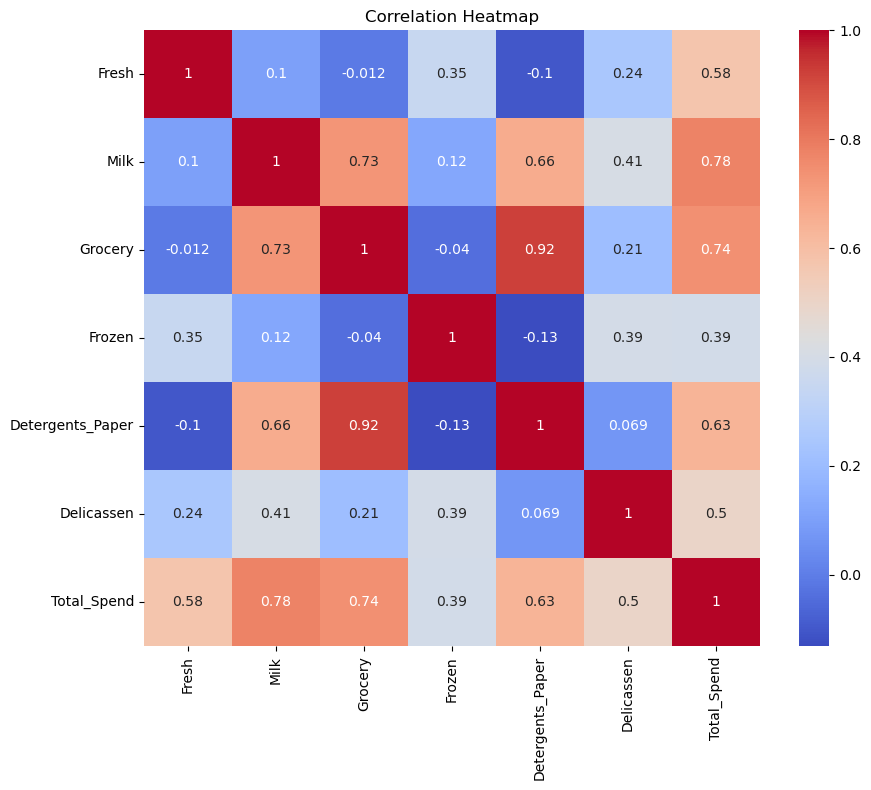

In [255]:
# Calculate the correlation matrix to show the correlation coefficient and relationship
correlation_matrix = df.corr()
# Create the heatmap
plt.figure(figsize=(10, 8))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', square=True)
plt.title('Correlation Heatmap')
plt.show()

##### The strongest correlation is 0.92 between Detergent Paper and Grocery

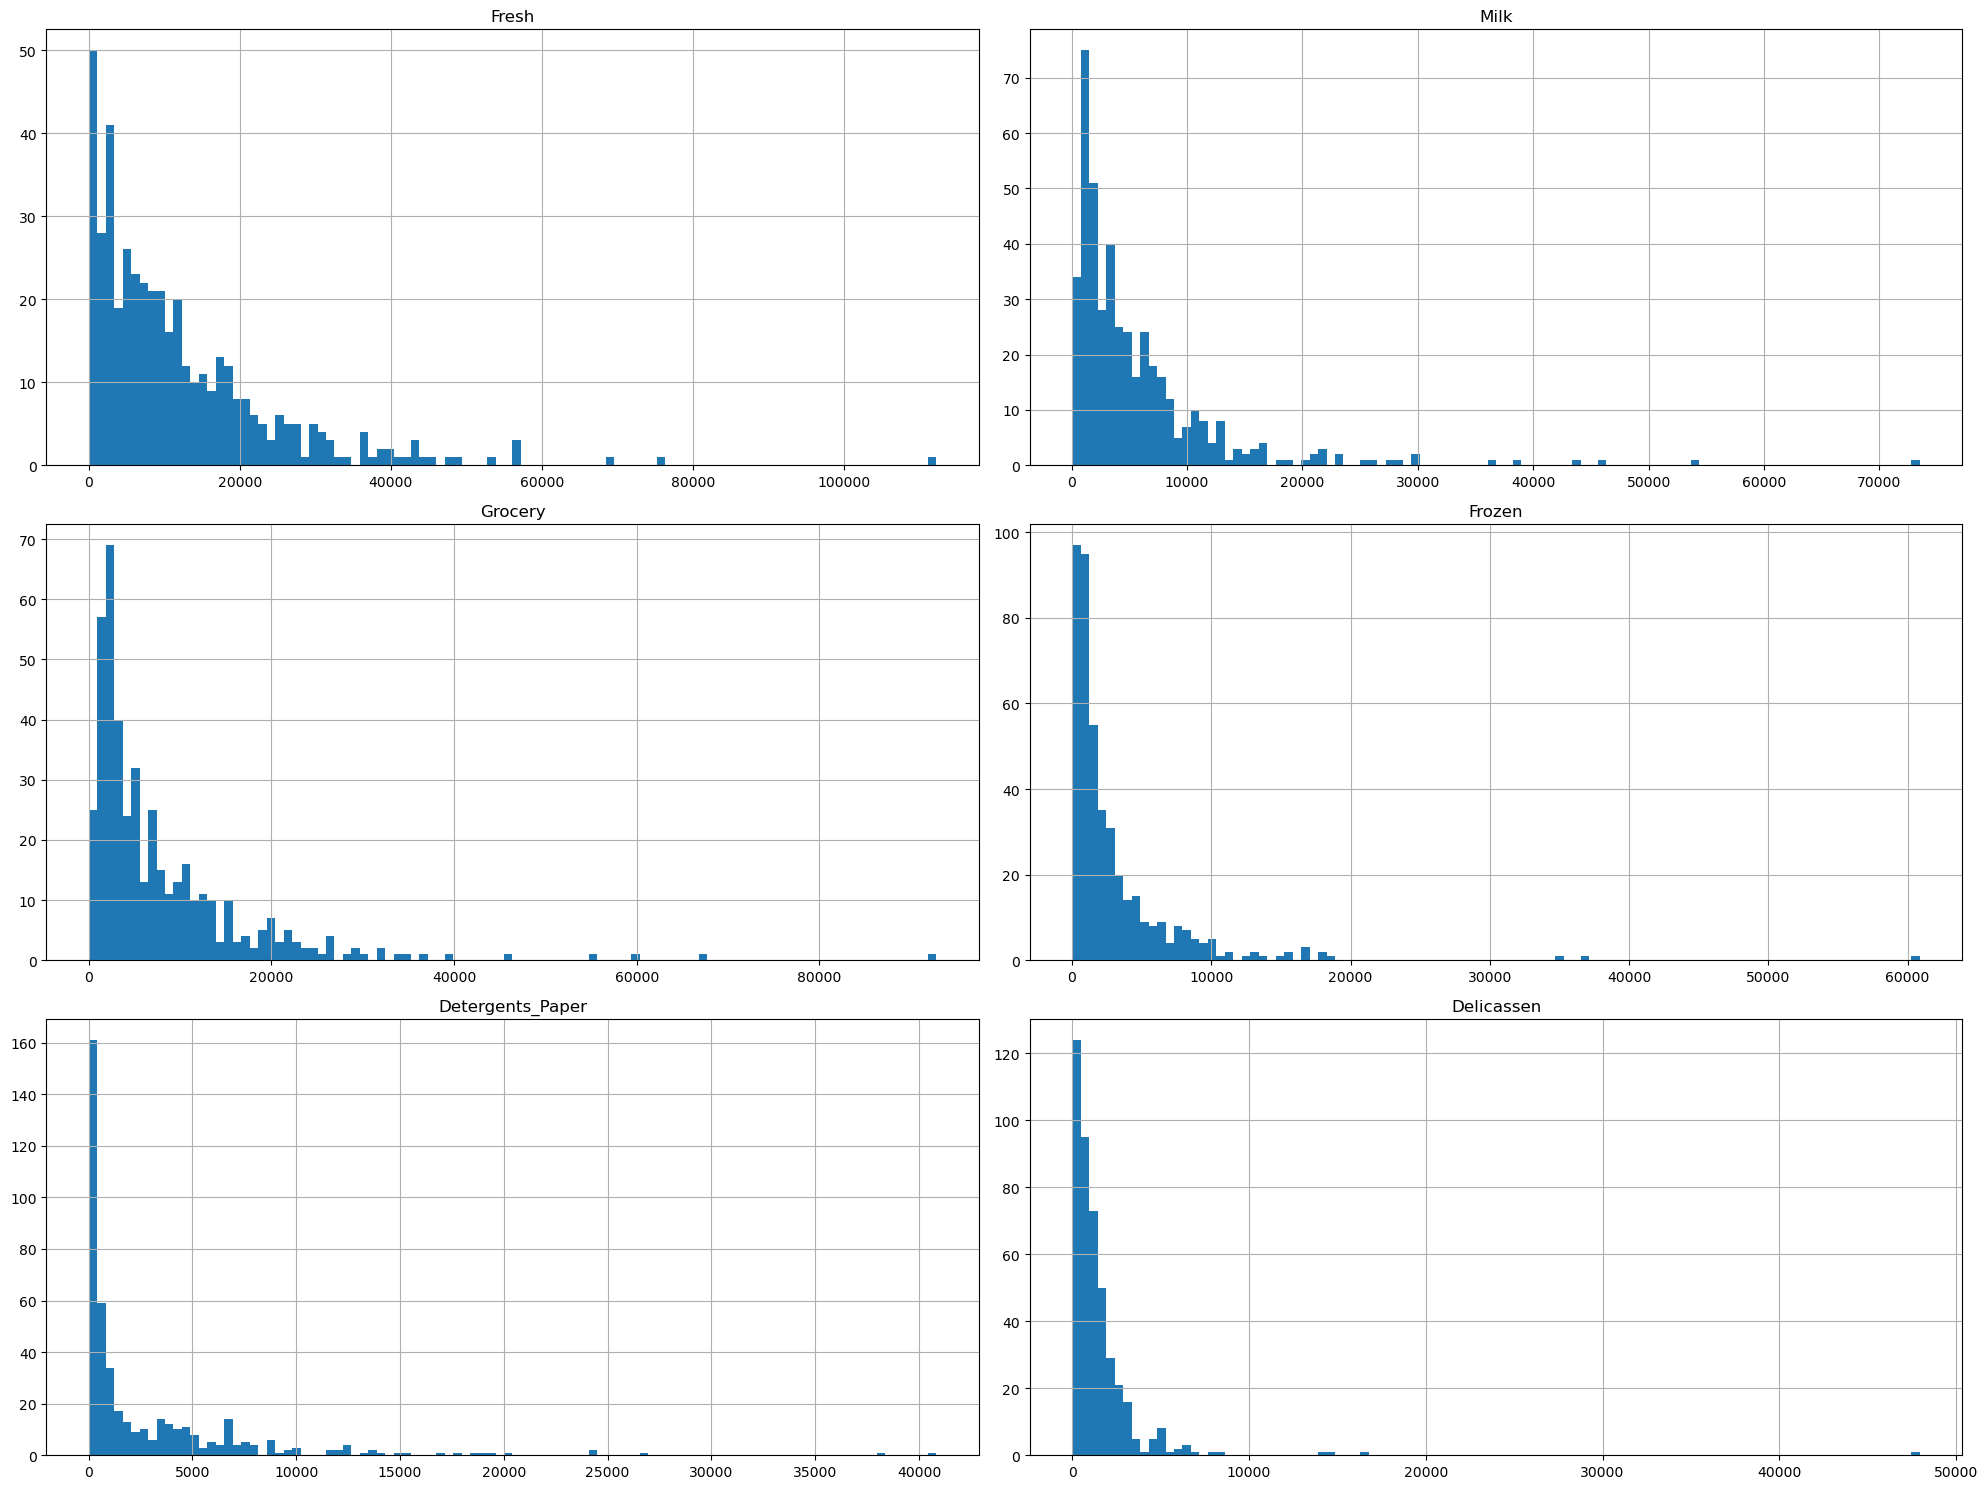

In [256]:
# Create Histograms to check distribution/normality
products = [
    'Fresh', 
    'Milk', 
    'Grocery', 
    'Frozen', 
    'Detergents_Paper', 
    'Delicassen']

df[products].hist(bins=100, figsize=(20,15))
plt.tight_layout()
plt.show()

#### The histograms are all tailed to the right and need to be transformed

### Data Transformation - Logarithmic Transformation

In [257]:
#Performing a Logarithmic Transformation to address skewness and normalize the distribution
df_log = np.log(num_columns)
df_log

,Fresh,Milk,Grocery,Frozen,Detergents_Paper,Delicassen,Total_Spend
0,9.446913,9.175335,8.930759,5.365976,7.891331,7.198931,10.437405
1,8.861775,9.191158,9.166179,7.474205,8.099554,7.482119,10.412291
2,8.756682,9.083416,8.946896,7.785305,8.165079,8.967504,10.508077
3,9.492884,7.086738,8.347827,8.764678,6.228511,7.488853,10.217605
4,10.026369,8.596004,8.881558,8.272571,7.482682,8.553525,10.738568
...,...,...,...,...,...,...,...
435,10.299003,9.396903,9.682030,9.483036,5.204007,7.698029,11.202343
436,10.577146,7.266129,6.638568,8.414052,4.532599,7.760467,10.786676
437,9.584040,9.647821,10.317020,6.079933,9.605149,7.532088,11.256832
438,9.238928,7.591357,7.710653,6.945051,5.123964,7.661527,9.788862


### Normalization

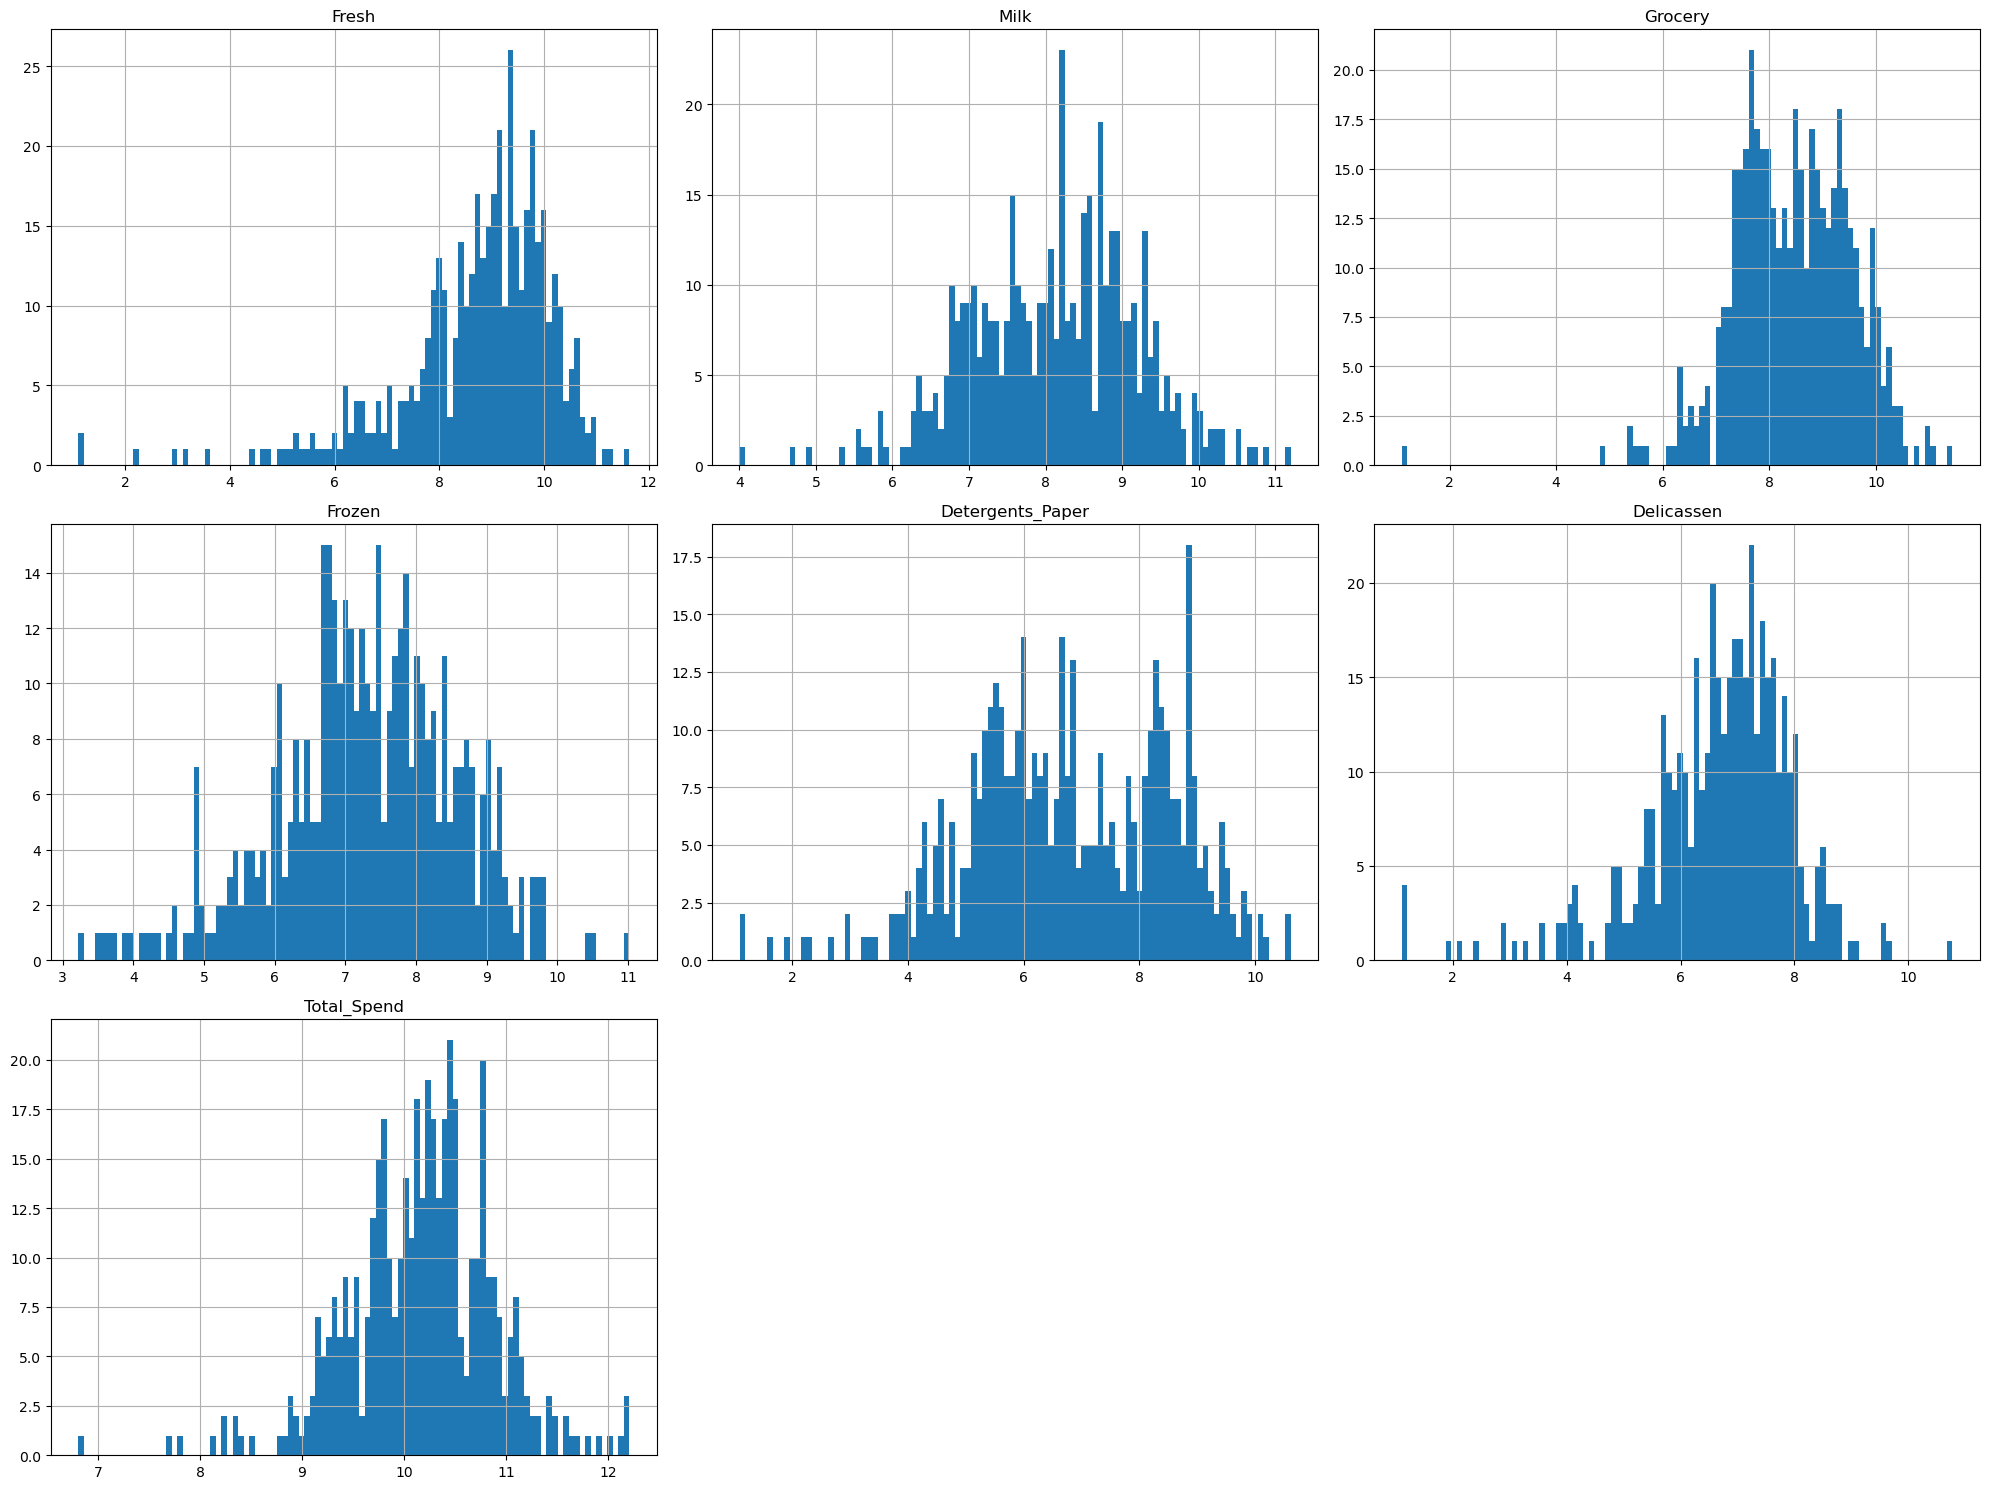

In [258]:
df_log.hist(bins=100, figsize=(20,15))
plt.tight_layout()
plt.show()

In [259]:
#Scaling the dataset
from sklearn.preprocessing import MinMaxScaler

# Initialize the scaler
scaler = MinMaxScaler()

# Fit and transform the dataset
df_normalized = pd.DataFrame(scaler.fit_transform(df_log), columns=df_log.columns)

In [260]:
df_normalized.describe()

,Fresh,Milk,Grocery,Frozen,Detergents_Paper,Delicassen,Total_Spend
count,440.000000,440.000000,440.000000,440.000000,440.000000,440.000000,440.000000
mean,0.724849,0.571533,0.710155,0.523561,0.597507,0.575104,0.623847
std,0.140571,0.150238,0.107954,0.164735,0.180808,0.135428,0.130318
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,0.660030,0.462322,0.636016,0.434852,0.467458,0.507613,0.548316
50%,0.755027,0.581969,0.712659,0.527279,0.589002,0.596543,0.632526
75%,0.820445,0.677044,0.790690,0.635711,0.753873,0.662053,0.707939
max,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000


# Part II - KMeans Clustering

The objective of the analysis is to group similar products together into clusters based on their attributes such as fresh, milk, grocery, frozen, detergents_paper, and delicatessen. To perform the k-means clustering analysis, you will need to pre-process the dataset, determine the optimal number of clusters, initialize the centroids, assign data points to clusters, update the centroids, and repeat until convergence.

In [263]:
# Import Libraries

from sklearn.cluster import KMeans


In [264]:
# Turn off warnings
import warnings
warnings.filterwarnings("ignore")

### Using the Elbow curve to determine the optimal number of clusters

In [265]:
def plot_distortion(df_normalized,max_clusters = 15):
    distortions = []
    for i in range(1, max_clusters +1):
         # Create KMeans model instance
        km = KMeans(n_clusters=i, init='k-means++', n_init=10, random_state=42)
        
        # Fit the model with the scaled dataframe
        km.fit(df_normalized)
        
        # Calculate the Inertia score and to a list
        distortions.append(km.inertia_)
        
    plt.plot(range(1,max_clusters +1), distortions, marker='o')
    plt.xlabel('Number of clusters')
    plt.ylabel('Distortion')
    plt.show() 

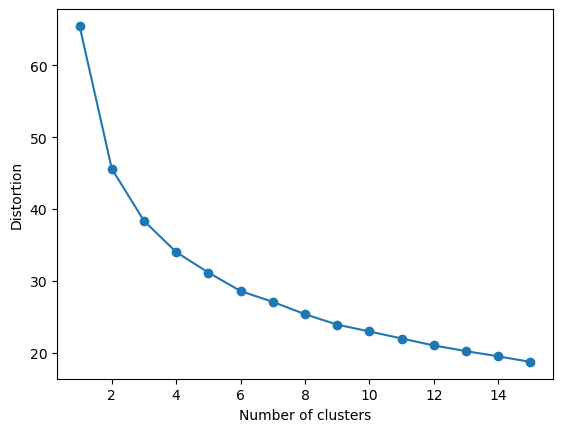

In [266]:
plot_distortion(df_normalized,max_clusters=15)

In [267]:
# Use k = 4

# Perform KMeans clustering with the optimal number of clusters
kmeans_random = KMeans(n_clusters = 4, 
                init = 'random', 
                random_state = 42)

# Fit the model with the scaled dataframe
kmeans_random.fit(df_normalized)

KMeans(init='random', n_clusters=4, random_state=42)

In [268]:
# Predict the cluster labels for the data points
cluster_labels = kmeans_random.predict(df_normalized)


In [269]:
# Get the cluster labels for the data points
cluster_labels = kmeans_random.labels_
cluster_labels

array([0, 3, 3, 2, 3, 0, 0, 3, 0, 3, 3, 2, 3, 3, 3, 1, 0, 2, 3, 0, 3, 1,
       2, 3, 3, 0, 2, 1, 3, 2, 3, 2, 1, 2, 1, 0, 2, 3, 0, 2, 2, 3, 0, 0,
       0, 3, 3, 3, 3, 3, 2, 0, 3, 0, 2, 0, 3, 0, 1, 0, 0, 3, 3, 3, 2, 0,
       0, 3, 2, 1, 2, 3, 2, 2, 3, 1, 2, 3, 1, 0, 1, 0, 3, 2, 0, 3, 3, 3,
       1, 2, 1, 2, 3, 2, 0, 0, 0, 1, 1, 2, 3, 3, 3, 2, 2, 1, 0, 3, 0, 0,
       2, 3, 2, 2, 2, 1, 1, 2, 2, 2, 2, 1, 1, 3, 2, 2, 2, 3, 0, 2, 2, 1,
       1, 1, 1, 1, 3, 0, 0, 2, 2, 2, 2, 2, 0, 0, 1, 2, 1, 2, 1, 1, 2, 2,
       1, 0, 0, 2, 0, 0, 0, 1, 2, 3, 3, 3, 3, 0, 1, 1, 0, 3, 0, 0, 1, 0,
       2, 2, 2, 2, 0, 3, 0, 3, 1, 1, 1, 0, 3, 0, 2, 1, 1, 0, 1, 2, 2, 0,
       2, 1, 3, 3, 2, 1, 1, 0, 1, 0, 0, 3, 2, 3, 1, 0, 0, 3, 0, 2, 0, 1,
       1, 0, 2, 2, 1, 2, 3, 1, 1, 2, 2, 0, 2, 1, 2, 0, 1, 2, 1, 2, 2, 2,
       2, 0, 3, 0, 2, 1, 2, 2, 1, 3, 2, 3, 3, 2, 0, 2, 2, 2, 0, 1, 2, 2,
       0, 3, 3, 2, 3, 1, 1, 1, 1, 2, 1, 1, 2, 2, 2, 3, 1, 3, 2, 2, 2, 1,
       1, 2, 1, 1, 1, 2, 2, 3, 2, 0, 2, 0, 0, 1, 3,

In [270]:
# number of records in each cluster

pd.Series(cluster_labels).value_counts()

2    140
1    112
0     94
3     94
dtype: int64

In [272]:
# adding Cluster labels in Dataframe
df_normalized['Clusters'] = cluster_labels

# display first 10 rows of data
df_normalized.head(10)

,Fresh,Milk,Grocery,Frozen,Detergents_Paper,Delicassen,Total_Spend,Clusters
0,0.792887,0.718009,0.757507,0.275354,0.713634,0.630253,0.672491,0
1,0.737313,0.720208,0.780276,0.545723,0.735510,0.659511,0.667839,3
2,0.727332,0.705239,0.759068,0.585620,0.742394,0.812973,0.685581,3
3,0.797253,0.427833,0.701127,0.711219,0.538941,0.660206,0.631777,2
4,0.847922,0.637521,0.752748,0.648109,0.670702,0.770203,0.728275,3
5,0.764673,0.696297,0.719915,0.420952,0.671761,0.638630,0.627182,0
6,0.788727,0.564524,0.749705,0.378951,0.730512,0.537461,0.625475,0
7,0.744091,0.625343,0.778830,0.538769,0.736400,0.697529,0.645691,3
8,0.721315,0.582771,0.738188,0.363344,0.667032,0.570449,0.561085,0
9,0.721997,0.737284,0.846018,0.492002,0.820928,0.676725,0.730520,3


In [273]:
# Get the cluster labels for the data points
cluster_labels = kmeans_random.labels_

# Get the centroids of the clusters
centroids = kmeans_random.cluster_centers_

centroids

array([[0.61185154, 0.64244039, 0.78246253, 0.34814968, 0.74153174,
        0.52261459, 0.63271275],
       [0.68975108, 0.41853546, 0.60288778, 0.48567268, 0.42441787,
        0.50201542, 0.47682637],
       [0.80390251, 0.53798677, 0.67438311, 0.64598472, 0.51847919,
        0.6043377 , 0.65245348],
       [0.76192798, 0.73288436, 0.81893173, 0.56178196, 0.7774158 ,
        0.6711379 , 0.74755094]])

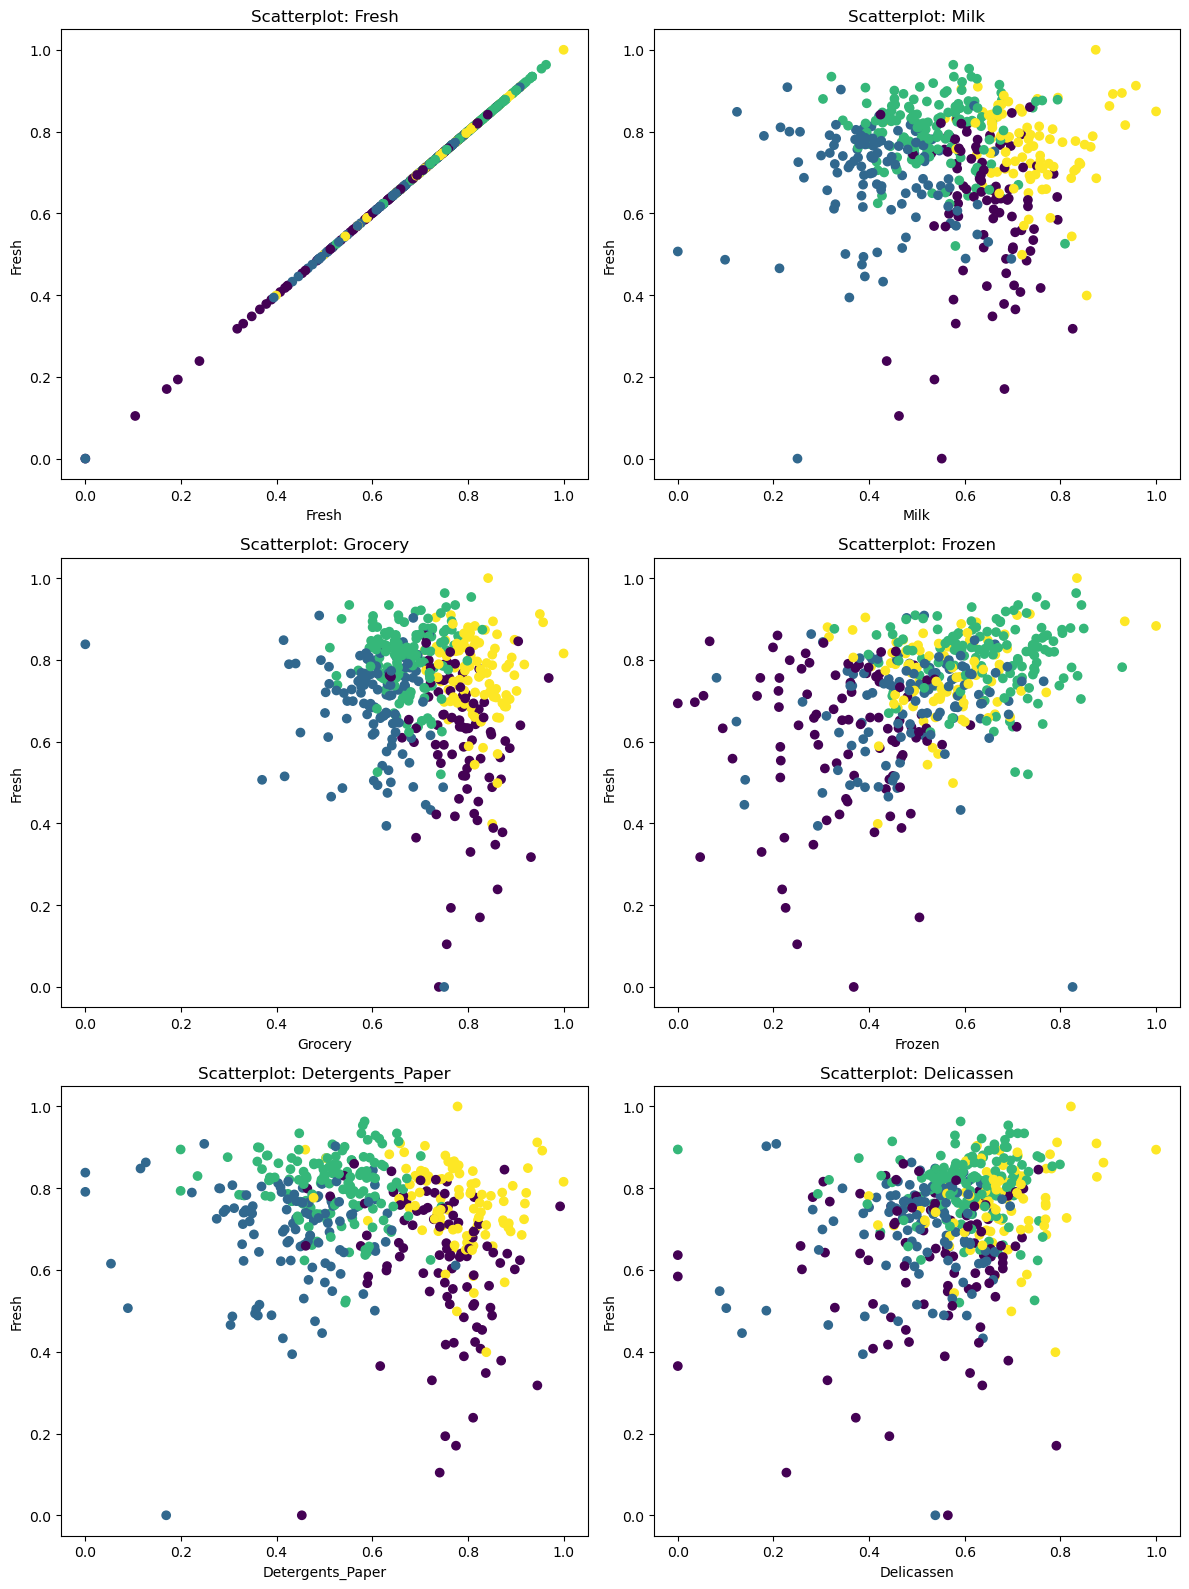

In [274]:

# List of feature names
feature_names = ['Fresh', 'Milk', 'Grocery', 'Frozen', 'Detergents_Paper',
                 'Delicassen']

# Calculate the number of rows and columns for subplots
num_rows = 3
num_cols = 2

# Create subplots
fig, axes = plt.subplots(num_rows, num_cols, figsize=(12, 16))

# Flatten the axes array for easier iteration
axes = axes.flatten()

# Iterate over each feature and create a scatterplot in each subplot
for i, feature in enumerate(feature_names):
    axes[i].scatter(df_normalized[feature], df_normalized['Fresh'], c=cluster_labels, cmap='viridis')
    axes[i].set_xlabel(feature)
    axes[i].set_ylabel('Fresh')
    axes[i].set_title(f'Scatterplot: {feature}')

# Adjust the spacing between subplots
plt.tight_layout()

# Show the plot
plt.show()


# Part III - Hierarchical Clustering 

Hierarchical clustering is a popular unsupervised machine learning algorithm that is used to identify patterns and group similar data points together in a hierarchy. The algorithm works by iteratively merging or splitting clusters based on a similarity measure until a dendrogram is formed.

To perform hierarchical clustering analysis, you will need to pre-process the dataset, determine the optimal number of clusters using techniques such as dendrogram.

### Plotting Dendogram to determine the number of clusters

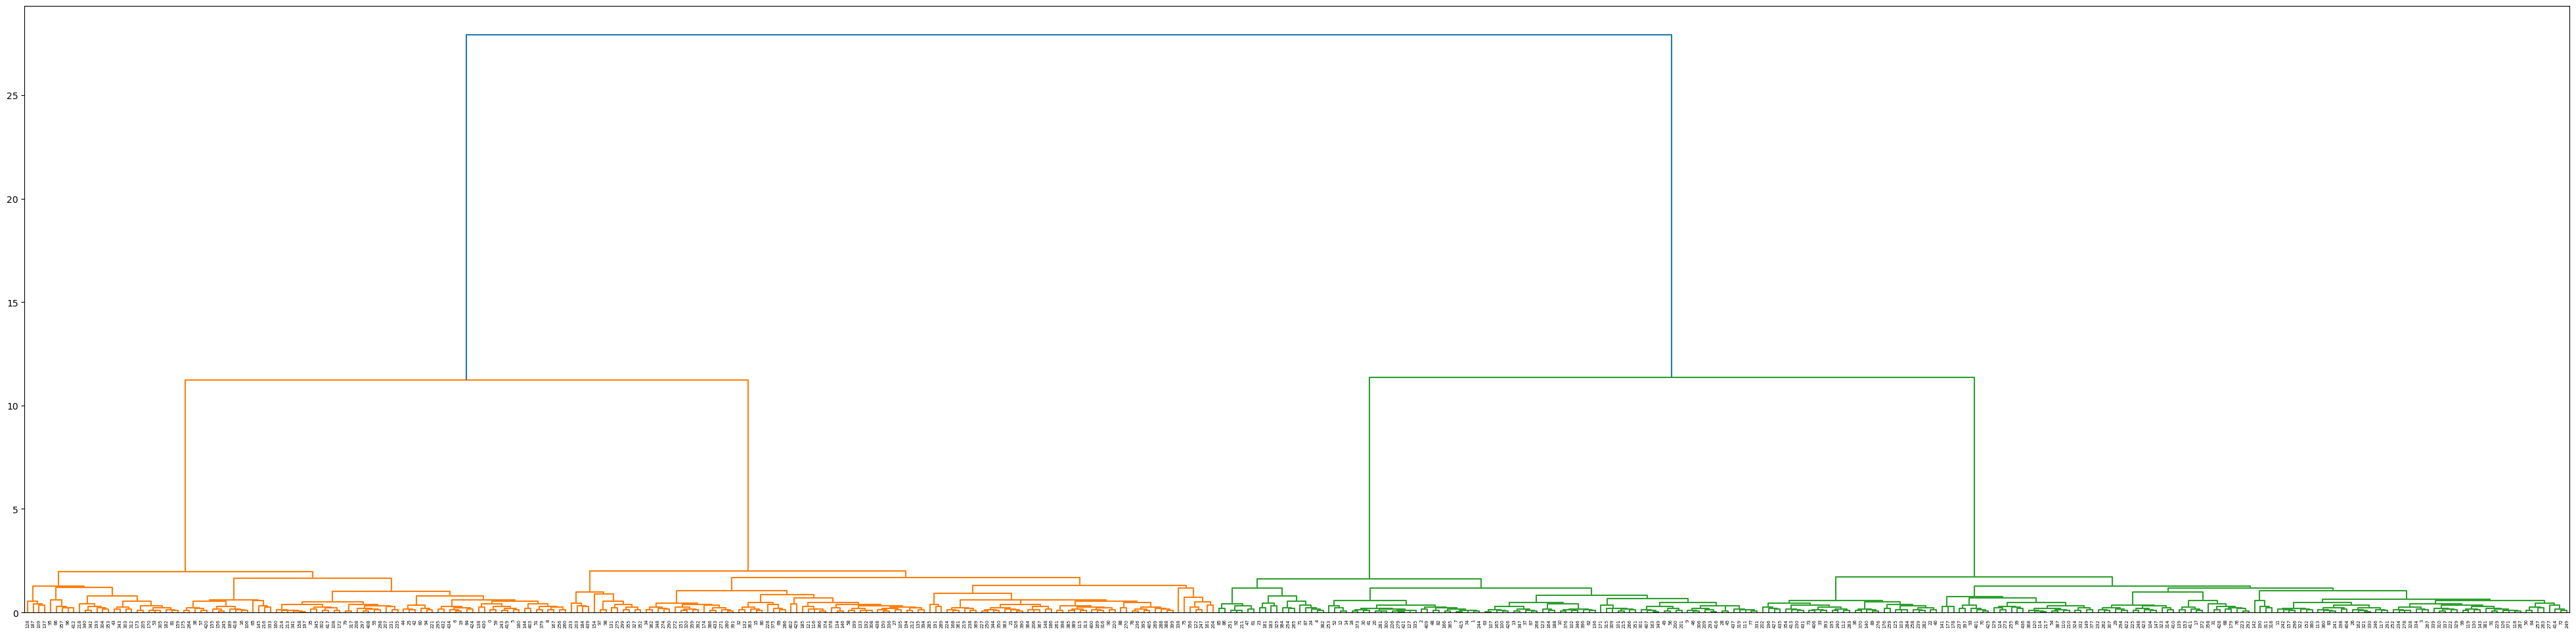

In [275]:
# Import Libraries

# aglomerative clustering
from sklearn.cluster import AgglomerativeClustering

# cluster hierarchy
import scipy.cluster.hierarchy as sch

# plotting dendogram
plt.figure(figsize=(50, 12))
dend=sch.dendrogram(sch.linkage(df_normalized,method='ward',metric='euclidean'))

In [276]:
# getting labels from Agglomearative Hierarchical clustering
hcluster = AgglomerativeClustering(n_clusters=4, affinity='euclidean', linkage='ward')  
hcluster.fit_predict(df_normalized)

array([1, 2, 2, 3, 2, 1, 1, 2, 1, 2, 2, 3, 2, 2, 2, 0, 1, 3, 2, 1, 2, 0,
       3, 2, 2, 1, 3, 0, 2, 3, 2, 3, 0, 3, 0, 1, 3, 2, 1, 3, 3, 2, 1, 1,
       1, 2, 2, 2, 2, 2, 3, 1, 2, 1, 3, 1, 2, 1, 0, 1, 1, 2, 2, 2, 3, 1,
       1, 2, 3, 0, 3, 2, 3, 3, 2, 0, 3, 2, 0, 1, 0, 1, 2, 3, 1, 2, 2, 2,
       0, 3, 0, 3, 2, 3, 1, 1, 1, 0, 0, 3, 2, 2, 2, 3, 3, 0, 1, 2, 1, 1,
       3, 2, 3, 3, 3, 0, 0, 3, 3, 3, 3, 0, 0, 2, 3, 3, 3, 2, 1, 3, 3, 0,
       0, 0, 0, 0, 2, 1, 1, 3, 3, 3, 3, 3, 1, 1, 0, 3, 0, 3, 0, 0, 3, 3,
       0, 1, 1, 3, 1, 1, 1, 0, 3, 2, 2, 2, 2, 1, 0, 0, 1, 2, 1, 1, 0, 1,
       3, 3, 3, 3, 1, 2, 1, 2, 0, 0, 0, 1, 2, 1, 3, 0, 0, 1, 0, 3, 3, 1,
       3, 0, 2, 2, 3, 0, 0, 1, 0, 1, 1, 2, 3, 2, 0, 1, 1, 2, 1, 3, 1, 0,
       0, 1, 3, 3, 0, 3, 2, 0, 0, 3, 3, 1, 3, 0, 3, 1, 0, 3, 0, 3, 3, 3,
       3, 1, 2, 1, 3, 0, 3, 3, 0, 2, 3, 2, 2, 3, 1, 3, 3, 3, 1, 0, 3, 3,
       1, 2, 2, 3, 2, 0, 0, 0, 0, 3, 0, 0, 3, 3, 3, 2, 0, 2, 3, 3, 3, 0,
       0, 3, 0, 0, 0, 3, 3, 2, 3, 1, 3, 1, 1, 0, 2,

In [277]:
# count number of records in every cluster
pd.Series(hcluster.labels_).value_counts()

3    140
0    112
1     94
2     94
dtype: int64

In [297]:
# adding Cluster labels in Dataframe
df_normalized['Clusters'] = hcluster.labels_

# display last 10 rows of data
df_normalized.tail(10)

,Fresh,Milk,Grocery,Frozen,Detergents_Paper,Delicassen,Total_Spend,Clusters
430,0.659092,0.603337,0.832881,0.402110,0.460807,0.675835,0.627154,1
431,0.755351,0.639965,0.720554,0.806726,0.643910,0.641923,0.680191,3
432,0.841412,0.423826,0.712628,0.304688,0.640104,0.504204,0.642578,1
433,0.616702,0.565346,0.600610,0.528536,0.501794,0.638487,0.445923,0
434,0.819301,0.592833,0.762893,0.425119,0.701000,0.581911,0.663775,1
435,0.873815,0.748793,0.830168,0.803344,0.431307,0.681817,0.814180,3
436,0.900232,0.452756,0.535811,0.666253,0.360770,0.688268,0.737186,3
437,0.805911,0.783654,0.891583,0.366915,0.893686,0.664673,0.824273,2
438,0.773134,0.497942,0.639501,0.477862,0.422898,0.678046,0.552361,0
439,0.649075,0.476525,0.650854,0.122539,0.532533,0.294719,0.394100,0


# Part IV - PCA

In this section you are going to perform principal component analysis (PCA) to draw conclusions about the underlying structure of the wholesale customer data. Since using PCA on a dataset calculates the dimensions which best maximize variance, we will find which compound combinations of features best describe customers.

In [310]:
# Import Library

from sklearn.decomposition import PCA

# Specify the desired number of principal components
pca = PCA(n_components=4)

df_normalized_ = df_normalized.drop('Clusters', axis=1) 

# Perform PCA on the scaled data
df_pca = pca.fit(df_normalized_)

df_pca_ = df_pca.transform(df_normalized_)

In [311]:
df_pca_

array([[-0.21185747,  0.12650262, -0.20829269, -0.03597565],
       [-0.22325251, -0.03281231,  0.01746125, -0.03448047],
       [-0.24816533, -0.11213984,  0.02615837, -0.16058701],
       ...,
       [-0.46959777,  0.04453157, -0.14557797,  0.02180255],
       [ 0.17790399, -0.04670822, -0.10021056, -0.12930609],
       [ 0.23505357,  0.46484977, -0.16770204,  0.10305872]])

In [313]:
# Create a DataFrame for the principal components
df_pca_ = pd.DataFrame(data=df_pca_, columns=['PC1', 'PC2', 'PC3', 'PC4'])

df_pca_

,PC1,PC2,PC3,PC4
0,-0.211857,0.126503,-0.208293,-0.035976
1,-0.223253,-0.032812,0.017461,-0.034480
2,-0.248165,-0.112140,0.026158,-0.160587
3,0.105151,-0.207375,0.053900,-0.020840
4,-0.169566,-0.230296,-0.024893,-0.074294
...,...,...,...,...
435,-0.110982,-0.395349,0.037995,-0.006704
436,0.217006,-0.322126,-0.100859,-0.045259
437,-0.469598,0.044532,-0.145578,0.021803
438,0.177904,-0.046708,-0.100211,-0.129306


In [314]:
# Calculate explained variance
explained_var = df_pca.explained_variance_ratio_

# Print explained variance for each principal component
for i, var in enumerate(explained_var):
    print(f"Explained Variance for Principal Component {i+1}: {var:.4f}")


Explained Variance for Principal Component 1: 0.4462
Explained Variance for Principal Component 2: 0.2777
Explained Variance for Principal Component 3: 0.0969
Explained Variance for Principal Component 4: 0.0879


## Random Forest

In [305]:
from sklearn.ensemble import RandomForestRegressor
import pandas as pd

# Assuming you have a DataFrame called 'df' containing the customer data

# Separate the features from the target variable
X = df_normalized.drop(['Clusters','Total_Spend'], axis=1)  # Replace 'Target' with the name of your target variable
y = df_normalized['Clusters']

# Create a Random Forest model
rf = RandomForestRegressor()

# Fit the model on the data
rf.fit(X, y)

# Get feature importances
importances = rf.feature_importances_

# Create a DataFrame to store feature importances
feature_importances = pd.DataFrame({'Feature': X.columns, 'Importance': importances})

# Sort the features by importance in descending order
feature_importances = feature_importances.sort_values('Importance', ascending=False)

# Print the top N features
top_n = 4  
top_features = feature_importances.head(top_n)
print(f"Top {top_n} Features:")
print(top_features)

# Select the top feature combinations
top_combinations = list(top_features['Feature'])
print("Top Feature Combinations:")
print(top_combinations)


Top 4 Features:
   Feature  Importance
3   Frozen    0.306426
0    Fresh    0.183666
1     Milk    0.170951
2  Grocery    0.152583
Top Feature Combinations:
['Frozen', 'Fresh', 'Milk', 'Grocery']


# Part V - Conclusion

From the model you developed and the exploratory data analysis (EDA) conducted, generate four bullet points as your findings.

##### EDA
* The histograms show an exponential decline in the number of orders for the respected products and very high skewness with was normalized with Logarithmic transformation.

* The strongest positive correlation between Detergents paper and Grocery products which indicates that consumers would often spend money on these two types of products and any marketing or sales strategy centres around these 2 products will be profitable for the business. 

##### K-MEANS/DENDOGRAM 
* Optimal number of clusters was determined using the "Elbow Curve" and the same number was used in Agglomerative Clustering

##### PCA
* From the above output, we can observe that the principal component 1 holds about 45% of the information while the principal component 2 holds about 28% , 3 holds only about 10% and 4 holds 9% of the information.

* Top 4 features was determined using Random Forest which are 'Frozen', 'Fresh', 'Milk', 'Grocery' in order of importance.